# Project: PASC - Long Covid Data Analysis
### Data Analysis work started in Nov 2023

Script is working fine on sepcified versions:

On colab environment: python 3.9, numpy 1.23.5, pandas 1.5.3

On my windows system: python 3.9, numpy 1.26.2, pandas sys 2.1.4

### About Study:
## Post Acute Sequelae of SARs – Cov2 infarction

SARs – Cov2 --> Severe Acute Respiratory Syndrome Corona virus 2

Sequelae --> after effects/ consequences

### PASC also known as long covid

# Initail Code

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
%%capture final_initals
%run final_inital_data.ipynb

In [14]:
print(final_initals)
fig_save_path = r'C:\Users\khan.ayesha2\OneDrive - Aga Khan University\Office Work\PASC- LONG COVID ANALYSIS\4_results\Ayesha_Graphs'

Total no. of Records: 32
Total no. of Useful Features: 137
**Lab Details Breakdown:**
lab_initials: Index(['MR', 'Age', 'Gender', 'Follow-up Date',
       'Follow-up Clinical Sample Collection Date', 'Follow-up Month'],
      dtype='object')
cbc_data: Index(['Gender', 'Haemoglobin (g/dl)', 'Haematocrit (%)', 'RBC (x10E12/L)',
       'MCV (fL)', 'MCH (pg)', 'MCHC  (g/dL)', 'RDW (%)', 'WBC (x10E9/L)',
       'Neutrophils (%)', 'Lymphocytes (%)', 'Eosinophils (%)',
       'Monocytes (%)', 'Basophils  (%)', 'Platelets (x10E9/L)',
       'ESR (mm/1st hr)', 'Cholesterol (mg/dl)'],
      dtype='object')
lipid_data: Index(['Cholesterol (mg/dl)', 'Triglycerides (mg/dl)', 'HDL (mg/dl)',
       'LDL (mg/dl)', 'VLDL (mg/dl)'],
      dtype='object')
kidney_data: Index(['BUN (mg/dl)', 'Creatinine (mg/dl)', 'eGFR (mL/min/1.73 m2)',
       'CRP ( mg/L)', 'HbA1c (%)', 'Glucose Fasting', 'TSH (uIU/ml)'],
      dtype='object')
urine_data: Index(['Appearance', 'Specific Gravity', 'pH', 'Urine Protein', 'G

# Basic Graphs

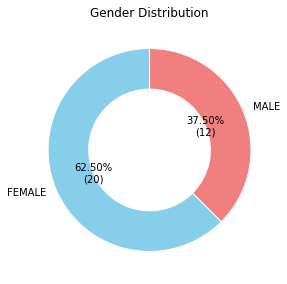

In [15]:
def format_labels(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{pct:.2f}%\n({absolute})'

# Create a pie chart for 'Gender'
plt.figure(figsize=(10, 5))

title = 'Gender Distribution'
# Plot pie chart for Gender
plt.subplot(1, 2, 1)
gender_counts = data_set['Gender'].value_counts()
labels_gender = [gender for gender in data_set['Gender'].unique()]

plt.pie(gender_counts, labels=labels_gender, autopct=lambda pct: format_labels(pct, gender_counts),
        startangle=90, colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')

plt.show()

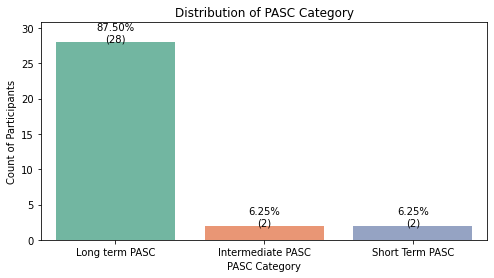

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot bar chart for Covid Category
sns.countplot(x='covid_category', data=data_set, palette='Set2', ax=ax)

# Display counts and percentages on top of each bar with adjusted height
total_records = len(data_set)

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_records) * 100
    count = p.get_height()
    
    # Adjusted height to prevent text from going beyond the border
    # Also, converted count to integer
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{percentage:.2f}%\n({int(count)})', ha="center")

# Set plot title and labels
plt.title('Distribution of PASC Category')
plt.xlabel('PASC Category')
plt.ylabel('Count of Participants')

# Adjust the ylim to prevent the percentage of the maximum bar from going beyond the graph boundary
ax.set_ylim(0, max(ax.patches, key=lambda x: x.get_height()).get_height() * 1.1)

# Save and display the plot
plt.savefig(f'{fig_save_path}/Distribution_of_Covid_Category.png', dpi=300, bbox_inches='tight')
plt.show()


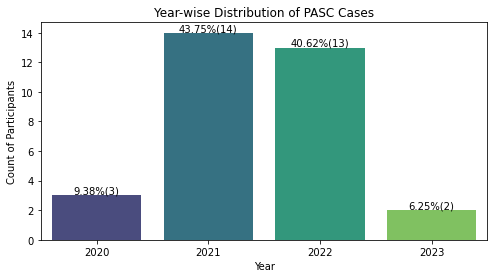

In [38]:
title = 'Year-wise Distribution of PASC Cases'
data_set['When did your long covid symptoms start?'] = pd.to_datetime(data_set['When did your long covid symptoms start?'])

# Extract the year from the datetime column
data_set['Start Year'] = data_set['When did your long covid symptoms start?'].dt.year

# Set up subplots
fig, ax = plt.subplots(figsize=(8, 4))

# Create a countplot for the year-wise distribution
sns.countplot(x='Start Year', data=data_set, palette='viridis', ax=ax)

# Set plot title and labels
plt.title(title)
plt.xlabel('Year')
plt.ylabel('Count of Participants')

# Display counts and percentages on top of each bar (exclude 0.0%)
total_cases = len(data_set)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_cases) * 100
    if percentage > 0.0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentage:.2f}%({int(height)})', ha="center")

plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')
plt.show()


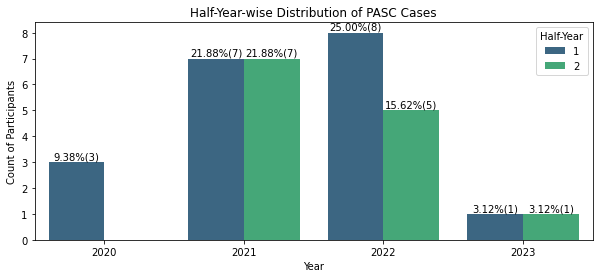

In [39]:
title = 'Half-Year-wise Distribution of PASC Cases'
data_set['When did your long covid symptoms start?'] = pd.to_datetime(data_set['When did your long covid symptoms start?'])

# Extract the year and half-year from the datetime column
data_set['Year'] = data_set['When did your long covid symptoms start?'].dt.year
data_set['Half-Year'] = data_set['When did your long covid symptoms start?'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

# Set up subplots
fig, ax = plt.subplots(figsize=(10, 4))

# Create a countplot for the year-wise and half-year-wise distribution
sns.countplot(x='Year', hue='Half-Year', data=data_set, palette='viridis', ax=ax)

# Set plot title and labels
plt.title(title)
plt.xlabel('Year')
plt.ylabel('Count of Participants')

# Display counts and percentages on top of each bar (exclude 0.0%)
total_cases = len(data_set)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_cases) * 100
    if percentage > 0.0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentage:.2f}%({int(height)})', ha="center")
plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')
plt.show()

ValueError: Could not interpret input 'covid_category'

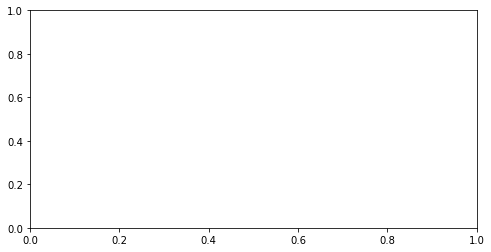

In [40]:
title = 'Relationship Between PASC Category and Gender'
fig, ax = plt.subplots(figsize=(8, 4))

# Use the 'Gender' column directly for quartile and min-max calculations
gender_values = diagnosis_data['Gender'].unique()

# Create gender bins and assign labels using pd.Categorical
diagnosis_data['Gender Group'] = pd.Categorical(diagnosis_data['Gender'], categories=gender_values)

ax = sns.countplot(x='Gender Group', hue='covid_category', data=diagnosis_data, palette='Set2')

total = len(diagnosis_data['Gender'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only for bars with non-zero height
        percentage = (height / total) * 100
        count = p.get_height()  # Fix to get count for each bar
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{percentage:.2f}%\n({int(count)})', ha="center")

# Adjust the ylim to prevent the percentage of the maximum bar from going beyond the graph boundary
ax.set_ylim(0, max(ax.patches, key=lambda x: x.get_height()).get_height() * 1.1)

plt.title(title)
plt.xlabel('Gender')
plt.ylabel('Count of Participants')
plt.legend(loc='upper right')
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

title = 'PASC Recovery Status'
# Visualization 2: Pie chart of recovery status
recovery_status_counts = concatenated_dfs['cbc_data_symptoms_data']['Have you made a full recovery?'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
colors = plt.cm.Set3.colors
explode = (0.1, 0)  # Explode the first slice for emphasis

# Plot the pie chart with counts and percentages
plt.pie(recovery_status_counts, labels=recovery_status_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(recovery_status_counts) / 100)})',
        startangle=140, colors=colors, explode=explode)

plt.title(title)
plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')
plt.show()


# Lab Relations with covid Categories

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

title_cholesterol_category_comparison = 'Relationship Between PASC Category and Cholesterol'

# Define bins for Cholesterol (mg/dl)
cholesterol_bins = [117, 150, 170, 190, 210, 230, 240]
cholesterol_labels = ['117-150', '150-170', '170-190', '190-210', '210-230', '230-240']

plt.figure(figsize=(12, 3))

# Grouped bar chart for Cholesterol and Covid Category
ax = sns.countplot(
    x=pd.cut(concatenated_dfs['lipid_data_diagnosis_data']['Cholesterol (mg/dl)'], bins=cholesterol_bins, labels=cholesterol_labels),
    hue=concatenated_dfs['lipid_data_diagnosis_data']['covid_category'],
    data=concatenated_dfs['lipid_data_diagnosis_data'], palette='Set2')

plt.title(title_cholesterol_category_comparison)
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Percentage of Participants')  # Update ylabel

# Adjust legend position
plt.legend(title='PASC Category', loc='upper right')

# Calculate percentages and add annotations for bars with non-zero height
total_per_category = concatenated_dfs['lipid_data_diagnosis_data'].groupby('covid_category').size()
total_data = len(concatenated_dfs['lipid_data_diagnosis_data'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Display annotation only for bars with non-zero height
        percentage = (height / total_data) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentage:.1f}%', ha="center")

# Save and display the plot
plt.savefig(f'{fig_save_path}/{title_cholesterol_category_comparison}.png', dpi=300, bbox_inches='tight')
plt.show()


KeyError: 'covid_category'

<Figure size 864x216 with 0 Axes>

In [42]:
# Calculate total count of participants
total_count = len(concatenated_dfs['cbc_data_diagnosis_data'])

# Define title
title_platelets = 'Percentage of Participants by Platelets and PASC Category'

# Define bins for Platelets (x10E9/L)
bins_platelets = [118, 234.25, 291, 363.25, 524]
labels_platelets = ['118-234.25', '234.25-291', '291-363.25', '363.25-524']

# Create a figure
plt.figure(figsize=(12, 6))

# Calculate percentages for Platelets
percentages_platelets = (concatenated_dfs['cbc_data_diagnosis_data'].groupby(['covid_category', pd.cut(concatenated_dfs['cbc_data_diagnosis_data']['Platelets (x10E9/L)'], bins=bins_platelets, labels=labels_platelets)])
                         .size() / total_count * 100).reset_index(name='Percentage')

# Grouped bar chart for Platelets and Covid Category with percentages
ax = sns.barplot(x='Platelets (x10E9/L)', y='Percentage', hue='covid_category', data=percentages_platelets, palette='Set2')

# Set plot title and axis labels
plt.title(title_platelets)
plt.xlabel('Platelets (x10E9/L)')
plt.ylabel('Percentage of Participants (%)')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha="center")

# Adjust legend position
plt.legend(loc='upper right')

# Save and display the plot
plt.savefig(f'{fig_save_path}/{title_platelets}.png', dpi=300, bbox_inches='tight')
plt.show()


KeyError: 'covid_category'

<Figure size 864x432 with 0 Axes>

# Correlation of Lab Details with Symptoms / Comorbidities

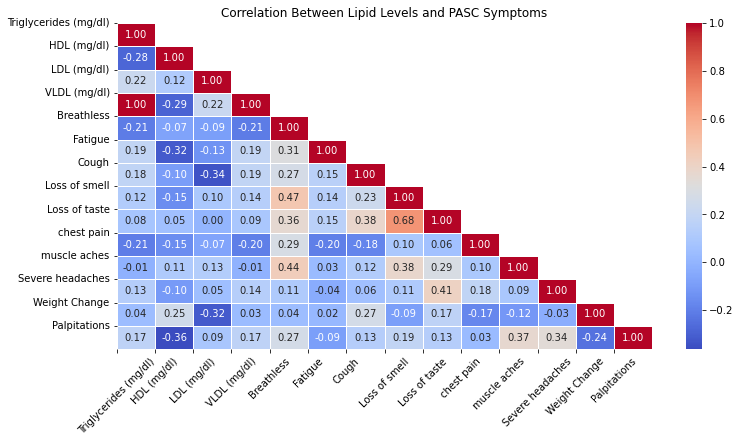

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

title = 'Correlation Between Lipid Levels and PASC Symptoms'
selected_columns = [
    'Triglycerides (mg/dl)',
    'HDL (mg/dl)',
    'LDL (mg/dl)',
    'VLDL (mg/dl)',
    
    'Breathless', 'Fatigue', 'Cough', 'Loss of smell',
    'Loss of taste', 'chest pain', 'muscle aches',
    'Severe headaches' , 'Weight Change',
    'Palpitations']

# Create a subset DataFrame with selected columns
subset_data = concatenated_dfs['lipid_data_symptoms_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to hide the upper triangle, excluding the main diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap with the upper triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()


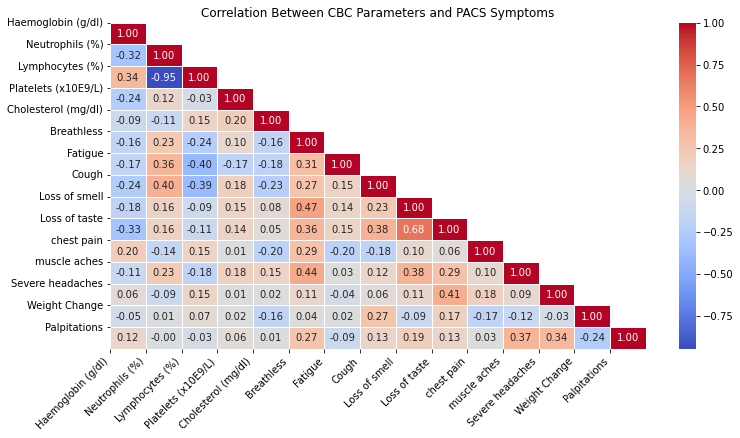

In [44]:
selected_columns = ['Haemoglobin (g/dl)',
       'Neutrophils (%)', 'Lymphocytes (%)', 'Platelets (x10E9/L)','Cholesterol (mg/dl)',
    
    'Breathless', 'Fatigue', 'Cough', 'Loss of smell',
    'Loss of taste', 'chest pain', 'muscle aches',
    'Severe headaches' , 'Weight Change',
    'Palpitations']



subset_data = concatenated_dfs['cbc_data_symptoms_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Fill NaN values with 0
subset_data = subset_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)


# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap with the lower triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

title = 'Correlation Between CBC Parameters and PACS Symptoms'

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

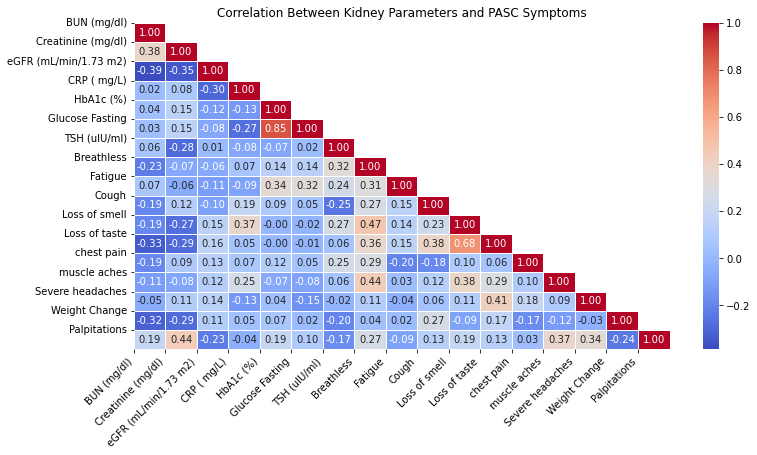

In [45]:
selected_columns = [ 'BUN (mg/dl)', 'Creatinine (mg/dl)', 'eGFR (mL/min/1.73 m2)',
       'CRP ( mg/L)', 'HbA1c (%)', 'Glucose Fasting', 'TSH (uIU/ml)',
    
    'Breathless', 'Fatigue', 'Cough', 'Loss of smell',
    'Loss of taste', 'chest pain', 'muscle aches',
    'Severe headaches' , 'Weight Change',
    'Palpitations']


subset_data = concatenated_dfs['kidney_data_symptoms_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Fill NaN values with 0
subset_data = subset_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap with the lower triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

title = 'Correlation Between Kidney Parameters and PASC Symptoms'

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

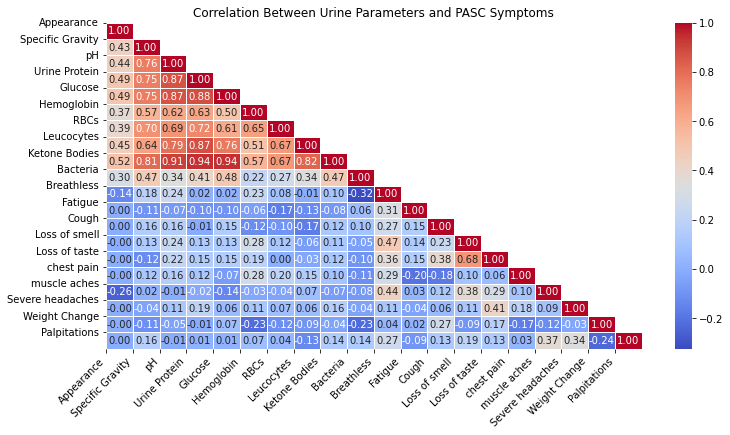

In [46]:
selected_columns = [ 'Appearance', 'Specific Gravity', 'pH', 'Urine Protein', 'Glucose',
       'Hemoglobin', 'RBCs', 'Leucocytes', 'Ketone Bodies', 'Bacteria',
    
    'Breathless', 'Fatigue', 'Cough', 'Loss of smell',
    'Loss of taste', 'chest pain', 'muscle aches',
    'Severe headaches' , 'Weight Change',
    'Palpitations']



subset_data = concatenated_dfs['urine_data_symptoms_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Fill NaN values with 0
subset_data = subset_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to display only the lower triangle
# (old mask having no 1 values with itself)mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap with the lower triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

title = 'Correlation Between Urine Parameters and PASC Symptoms'

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

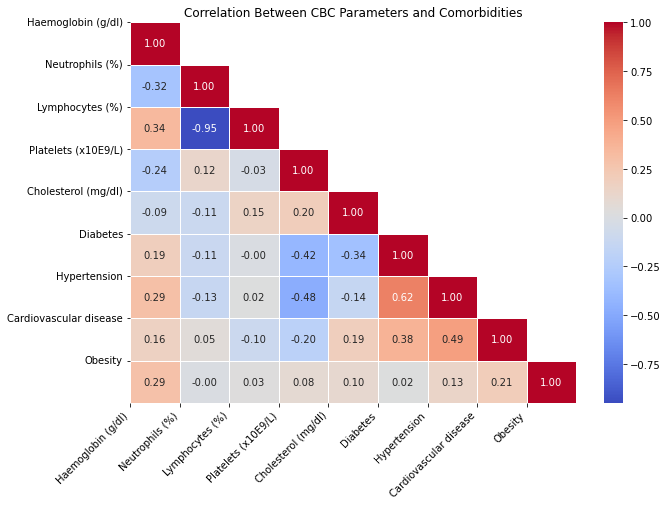

In [47]:
selected_columns = ['Haemoglobin (g/dl)',
       'Neutrophils (%)', 'Lymphocytes (%)', 'Platelets (x10E9/L)','Cholesterol (mg/dl)',
'Diabetes', 
       'Hypertension', 'Cardiovascular disease', 'Obesity'
]


subset_data = concatenated_dfs['cbc_data_comorbidities_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Fill NaN values with 0
subset_data = subset_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create a heatmap with the lower triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

title = 'Correlation Between CBC Parameters and Comorbidities'

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

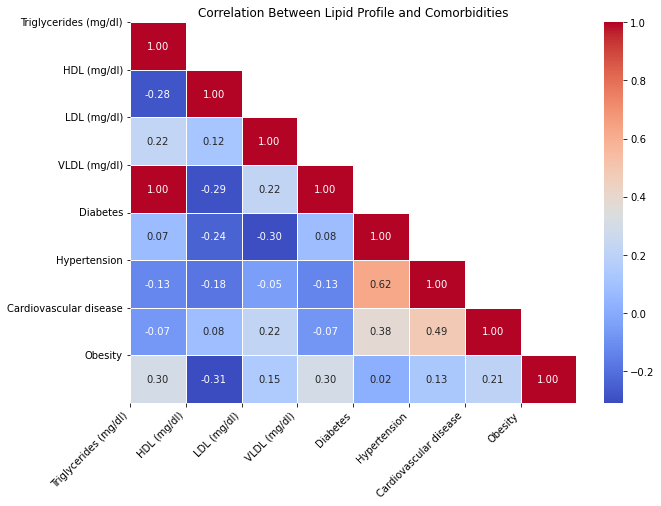

In [48]:
selected_columns = [    'Triglycerides (mg/dl)',
    'HDL (mg/dl)',
    'LDL (mg/dl)',
    'VLDL (mg/dl)',
'Diabetes', 
       'Hypertension', 'Cardiovascular disease', 'Obesity'
]


subset_data = concatenated_dfs['lipid_data_comorbidities_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Fill NaN values with 0
subset_data = subset_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)


# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create a heatmap with the lower triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

title = 'Correlation Between Lipid Profile and Comorbidities'

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

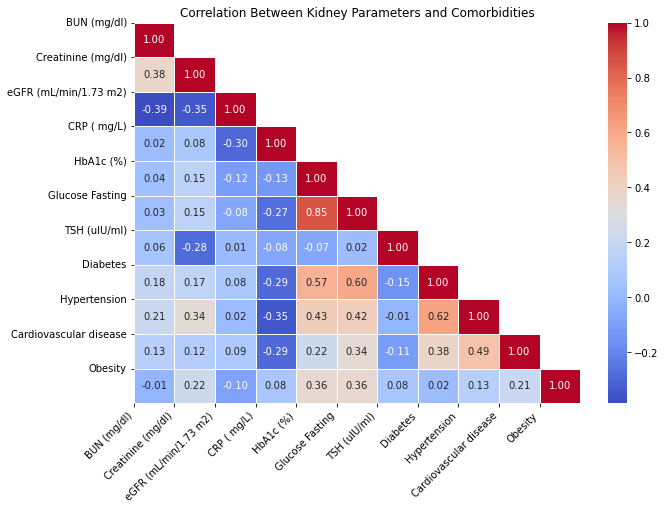

In [49]:
selected_columns = [ 'BUN (mg/dl)', 'Creatinine (mg/dl)', 'eGFR (mL/min/1.73 m2)',
       'CRP ( mg/L)', 'HbA1c (%)', 'Glucose Fasting', 'TSH (uIU/ml)',
    
'Diabetes',
       'Hypertension', 'Cardiovascular disease', 'Obesity'
]

subset_data = concatenated_dfs['kidney_data_comorbidities_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Fill NaN values with 0
subset_data = subset_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)


# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create a heatmap with the lower triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

title = 'Correlation Between Kidney Parameters and Comorbidities'

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

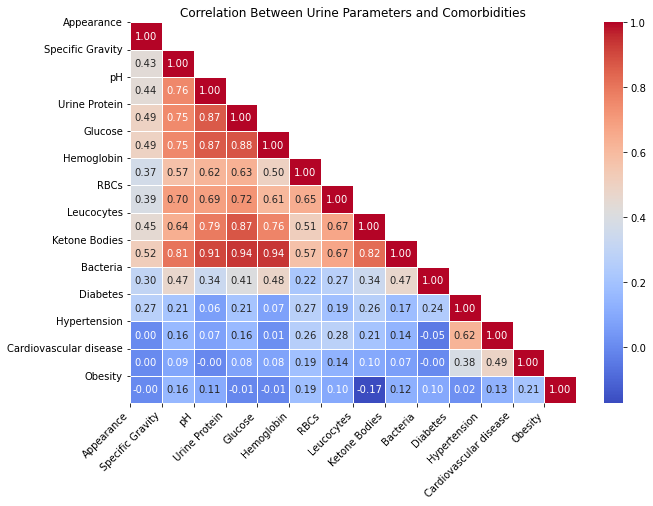

In [50]:


selected_columns = [ 'Appearance', 'Specific Gravity', 'pH', 'Urine Protein', 'Glucose',
       'Hemoglobin', 'RBCs', 'Leucocytes', 'Ketone Bodies', 'Bacteria',
'Diabetes',
       'Hypertension', 'Cardiovascular disease', 'Obesity'
]

subset_data = concatenated_dfs['urine_data_comorbidities_data'][selected_columns]

# Convert categorical columns to numeric format
categorical_columns = subset_data.select_dtypes(include='object').columns
subset_data[categorical_columns] = subset_data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Fill NaN values with 0
subset_data = subset_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = subset_data.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)


# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create a heatmap with the lower triangle masked
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set custom tick labels
plt.xticks(range(len(correlation_matrix.columns)), selected_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), selected_columns, rotation=0)

title ='Correlation Between Urine Parameters and Comorbidities'

plt.title(title)
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')
plt.show()

# Particpant Data Relations with covid Caategories

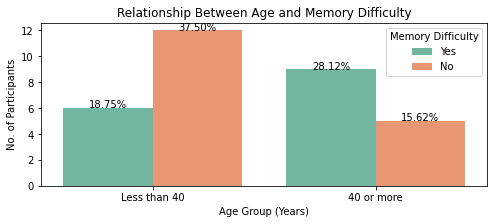

In [51]:


# Create a new column for age groups
bins = [0, 40, float('inf')]
labels = ['Less than 40', '40 or more']
concatenated_dfs['lab_initials_symptoms_data']['Age Group'] = pd.cut(
    concatenated_dfs['lab_initials_symptoms_data']['Age'],
    bins=bins,
    labels=labels
)

# Create a bar chart
title = 'Relationship Between Age and Memory Difficulty'
plt.figure(figsize=(8, 3))

ax = sns.countplot(
    x='Age Group',
    hue='Memory difficulties',
    data=concatenated_dfs['lab_initials_symptoms_data'],
    palette='Set2'
)

# Display percentages on each bar (excluding 0.0%)
total = len(concatenated_dfs['lab_initials_symptoms_data'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    if percentage > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{percentage:.2f}%', ha="center")

plt.title(title)
plt.xlabel('Age Group (Years)')
plt.ylabel('No. of Participants')
plt.legend(title='Memory Difficulty', loc='upper right')
plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\khan.ayesha2\OneDrive - Aga Khan University\Office Work\PASC- LONG COVID ANALYSIS\4_results\Ayesha_Graphs


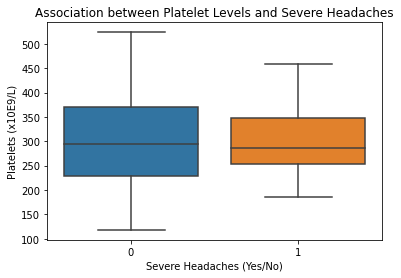

In [52]:
title = 'Association between Platelet Levels and Severe Headaches'
print(fig_save_path)

# Assuming 'Platelets (x10E9/L)' is a numeric column
sns.boxplot(x='Severe headaches', y='Platelets (x10E9/L)', data=concatenated_dfs['cbc_data_symptoms_data'])
plt.title(title)
plt.xlabel('Severe Headaches (Yes/No)')
plt.ylabel('Platelets (x10E9/L)')
plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')
plt.show()


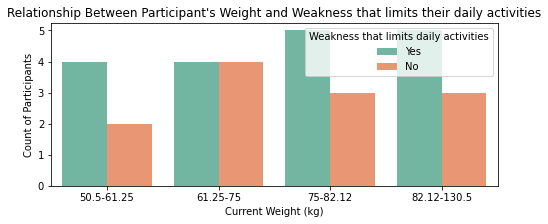

In [53]:
title = "Relationship Between Participant's Weight and Weakness that limits their daily activities"

# Define bins for Current weight (kg)
weight_bins = [50.5, 61.25, 75, 82.12, 130.5]
weight_labels = ['50.5-61.25', '61.25-75', '75-82.12', '82.12-130.5']

plt.figure(figsize=(8, 3))

# Create a count plot with bins for Current weight (kg)
sns.countplot(x=pd.cut(concatenated_dfs['vitals_data_symptoms_data']['Current weight (kg):'], bins=weight_bins, labels=weight_labels),
              hue='Weakness that limits daily activities',
              data=concatenated_dfs['vitals_data_symptoms_data'],
              palette='Set2')

# Set plot details
plt.title(title)
plt.xlabel('Current Weight (kg)')
plt.ylabel('Count of Participants')

# Save and display the plot
plt.savefig(f'{fig_save_path}\{title}.png', dpi=300, bbox_inches='tight')

plt.show()


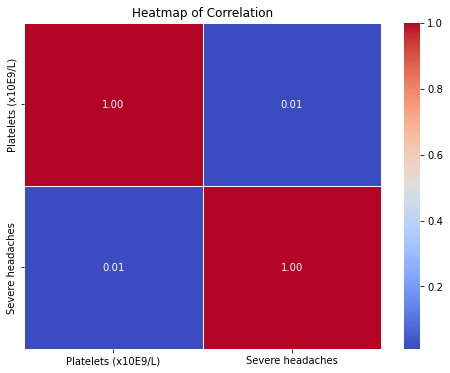

In [54]:
title = 'a'
# Assuming 'Platelets (x10E9/L)' is a numeric column
heatmap_data = concatenated_dfs['cbc_data_symptoms_data'][['Platelets (x10E9/L)', 'Severe headaches']]
heatmap_data['Severe headaches'] = heatmap_data['Severe headaches'].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Heatmap of Correlation')
plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')
plt.show()


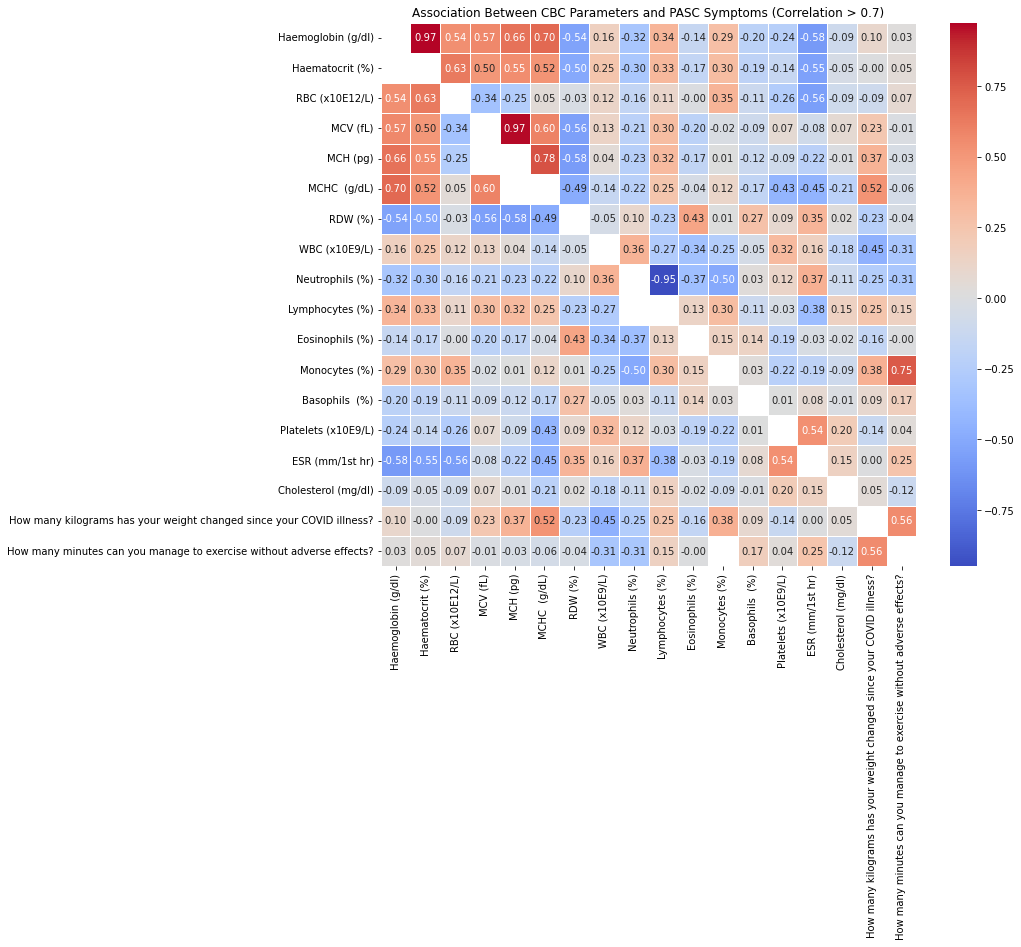

In [55]:
# Convert categorical columns to numeric format
categorical_columns = concatenated_dfs['cbc_data_symptoms_data'].select_dtypes(include='object').columns
concatenated_dfs['cbc_data_symptoms_data'][categorical_columns] = concatenated_dfs['cbc_data_symptoms_data'][categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Select numeric columns for correlation analysis
numeric_columns = concatenated_dfs['cbc_data_symptoms_data'].select_dtypes(include=['float64']).columns

# Calculate correlation matrix
correlation_matrix = concatenated_dfs['cbc_data_symptoms_data'][numeric_columns].corr()

# Create masks to display only correlations above 0.7 and only the lower triangle
threshold_mask = correlation_matrix.abs() > 0.7
lower_triangle_mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Combine the masks
combined_mask = threshold_mask & lower_triangle_mask

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the combined mask
sns.heatmap(correlation_matrix, mask=combined_mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Association Between CBC Parameters and PASC Symptoms (Correlation > 0.7)')
plt.show()


# Correlation of Participant Details with Symptoms/ Comorbidities

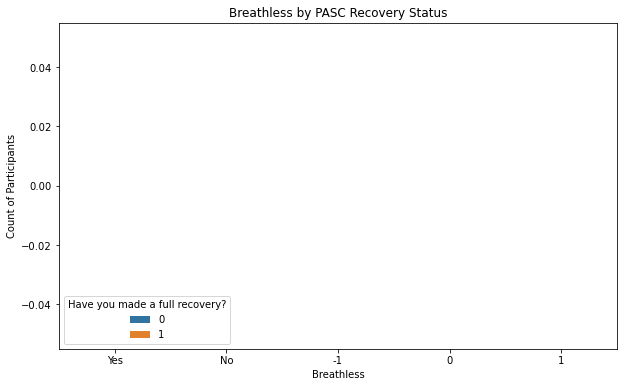

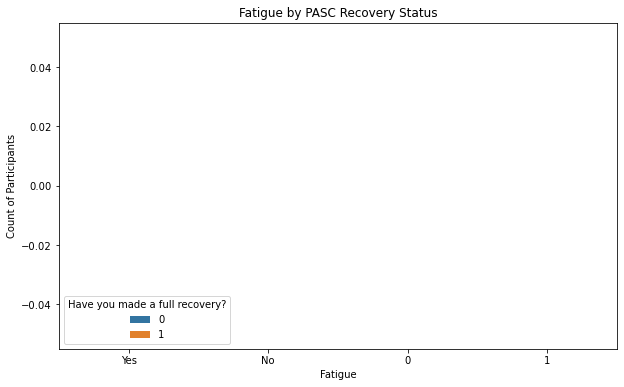

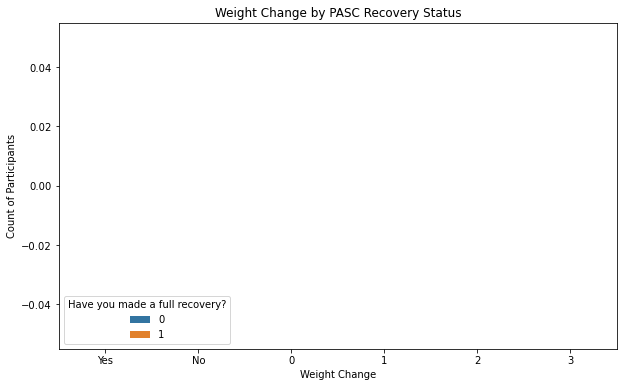

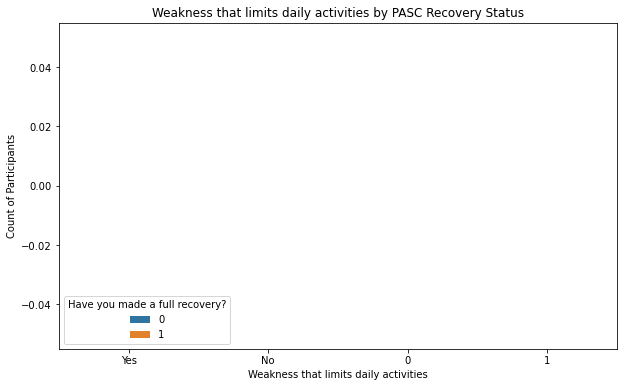

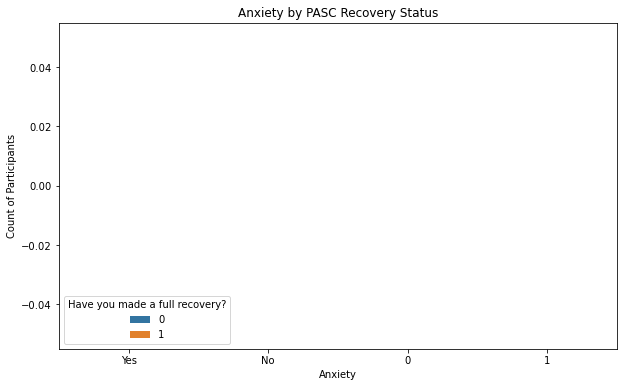

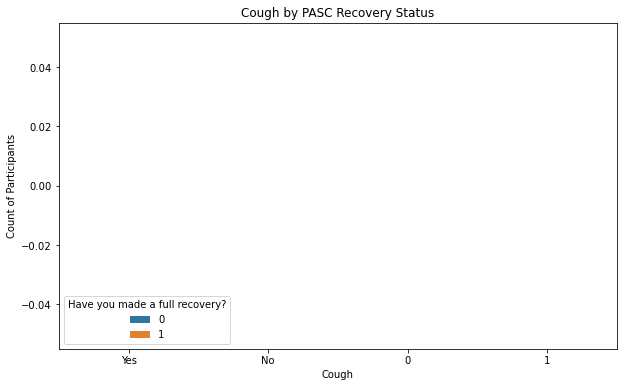

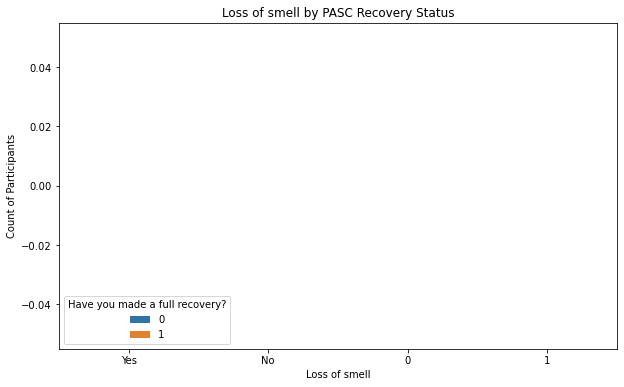

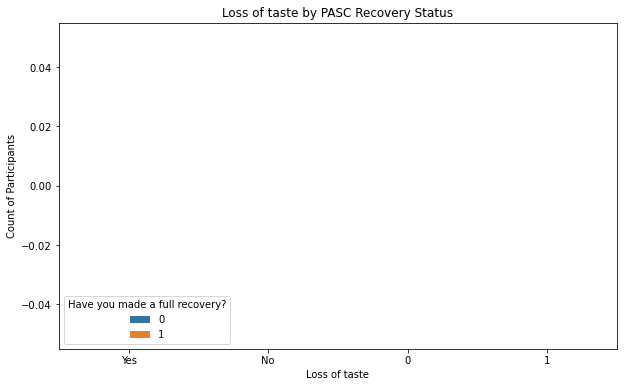

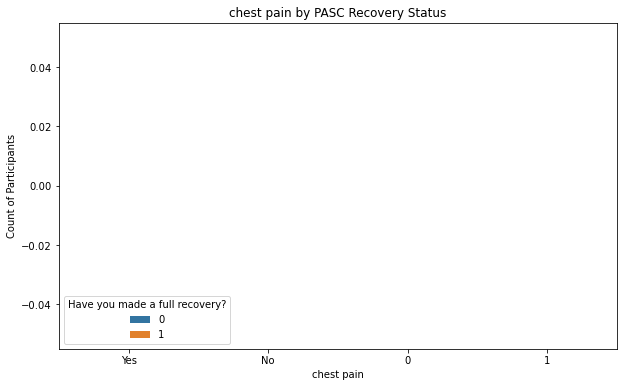

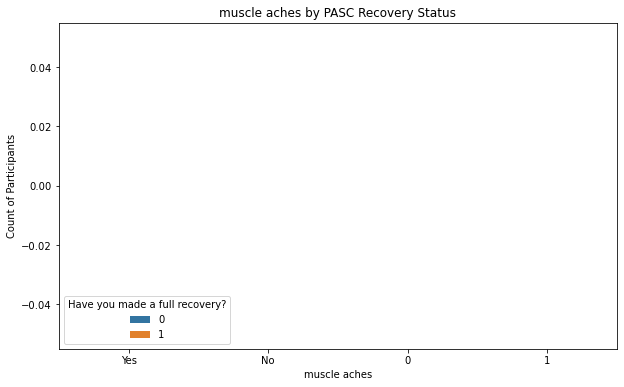

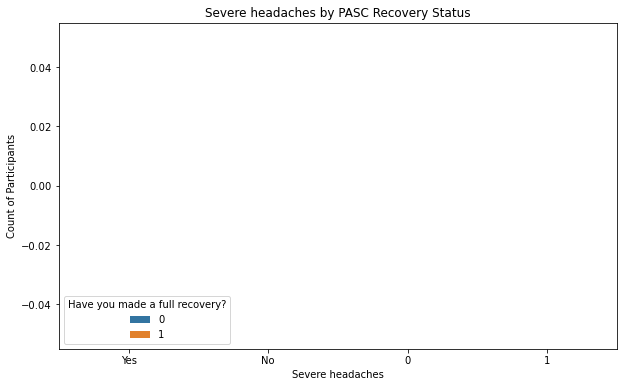

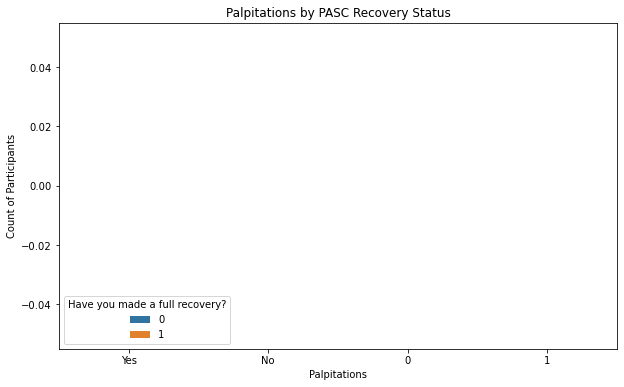

In [56]:

numeric_columns = ['Haemoglobin (g/dl)', 'Haematocrit (%)', 'RBC (x10E12/L)', 'MCV (fL)', 'MCH (pg)']
concatenated_dfs['cbc_data_symptoms_data'][numeric_columns] = concatenated_dfs['cbc_data_symptoms_data'][numeric_columns].apply(pd.to_numeric, errors='coerce')

# Visualization 1: Bar chart of symptoms frequency by recovery status
symptoms_columns = ['Breathless', 'Fatigue', 'Weight Change', 'Weakness that limits daily activities', 'Anxiety', 'Cough', 'Loss of smell',
    'Loss of taste', 'chest pain', 'muscle aches',
    'Severe headaches',
    'Palpitations']

# Counter variable for generating unique filenames
count = 1

for symptom in symptoms_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    
    # Create a count plot with custom order for x-axis ticks
    unique_values = sorted(concatenated_dfs['cbc_data_symptoms_data'][symptom].astype(str).unique())
    ax = sns.countplot(x=symptom, data=concatenated_dfs['cbc_data_symptoms_data'], hue='Have you made a full recovery?',
                       order=['Yes', 'No'] + unique_values)
    
    # Calculate percentages and display on each bar
    total = len(concatenated_dfs['cbc_data_symptoms_data'])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Display label only if height is greater than 0
            ax.annotate(f'{height/total*100:.2f}% ({int(height)})', (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'{symptom} by PASC Recovery Status')
    plt.xlabel(symptom)
    plt.ylabel('Count of Participants')
    
    # Save the graph with a unique filename
    plt.savefig(f'{fig_save_path}/{count}_{symptom}_Recovery_Status.png', dpi=300, bbox_inches='tight')
    
    # Increment the counter variable
    count += 1
    
    # Display the current plot
    plt.show()


<Figure size 864x576 with 0 Axes>

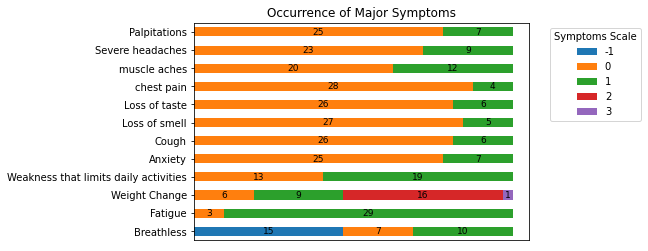

In [57]:
title = 'Occurrence of Major Symptoms'

# Calculate percentages and counts for each symptom
symptoms_counts = concatenated_dfs['cbc_data_symptoms_data'][symptoms_columns].apply(lambda x: x.value_counts())
symptoms_percentages = concatenated_dfs['cbc_data_symptoms_data'][symptoms_columns].apply(lambda x: x.value_counts(normalize=True) * 100).T

# Increase the plot height by adjusting the figsize parameter
plt.figure(figsize=(12, 8))

# Create a horizontal stacked bar chart of symptoms frequency using percentages
ax = symptoms_percentages.plot(kind='barh', stacked=True)

# Set plot details
plt.title(title)

# Display percentages and counts inside each bar
for p, count in zip(ax.patches, symptoms_counts.values.flatten()):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = width
    if percentage > 0:
        plt.annotate(f'{int(count)}', (x + width / 2, y + height / 2),
                     ha='center', va='center', color='black', fontsize=9)

# Move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Symptoms Scale')
plt.xticks([])
# Save the plot as an image
plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


<Figure size 864x576 with 0 Axes>

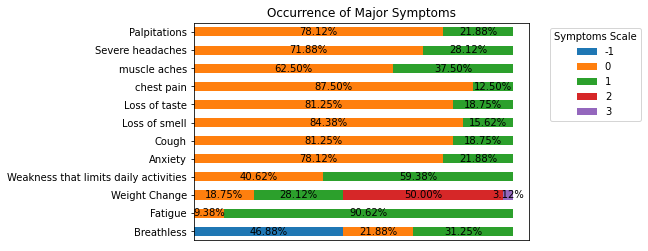

In [58]:
title = 'Occurrence of Major Symptoms'

# Calculate percentages for each symptom
symptoms_percentages = concatenated_dfs['cbc_data_symptoms_data'][symptoms_columns].apply(lambda x: x.value_counts(normalize=True) * 100).T

# Increase the plot height by adjusting the figsize parameter
plt.figure(figsize=(12, 8))

# Create a horizontal stacked bar chart of symptoms frequency using percentages
ax = symptoms_percentages.plot(kind='barh', stacked=True)

# Set plot details
plt.title(title)

# Display percentages inside each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = width
    if percentage > 0:
        plt.annotate(f'{percentage:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Symptoms Scale')
plt.xticks([])
# Save the plot as an image
plt.savefig(f'{fig_save_path}/{title}.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


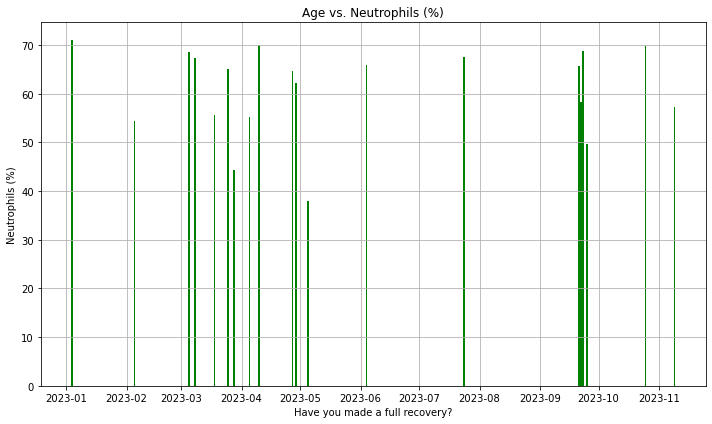

In [59]:
selected_columns = ['Neutrophils (%)', 'Lymphocytes (%)', 'Gender','Have you made a full recovery?']
# Scatter plot of Age vs. Neutrophils (%)
plt.figure(figsize=(10, 6))
plt.bar(data_set['Follow-up Date'],data_set['Neutrophils (%)'],color='g')
plt.title('Age vs. Neutrophils (%)')
plt.xlabel('Have you made a full recovery?')
plt.ylabel('Neutrophils (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
data_set['Follow-up Date']

0    2023-03-18
1    2023-03-25
2    2023-03-25
3    2023-03-25
4    2023-03-25
5    2023-03-28
6    2023-01-04
7    2023-01-04
8    2023-06-04
9    2023-06-04
10   2023-04-27
11   2023-04-27
12   2023-04-27
13   2023-05-05
14   2023-02-05
15   2023-04-29
16   2023-04-29
17   2023-03-05
18   2023-03-05
19   2023-04-05
20   2023-07-24
21   2023-03-08
22   2023-11-09
23   2023-09-21
24   2023-09-22
25   2023-09-23
26   2023-09-23
27   2023-09-23
28   2023-09-23
29   2023-09-25
30   2023-04-10
31   2023-10-25
Name: Follow-up Date, dtype: datetime64[ns]

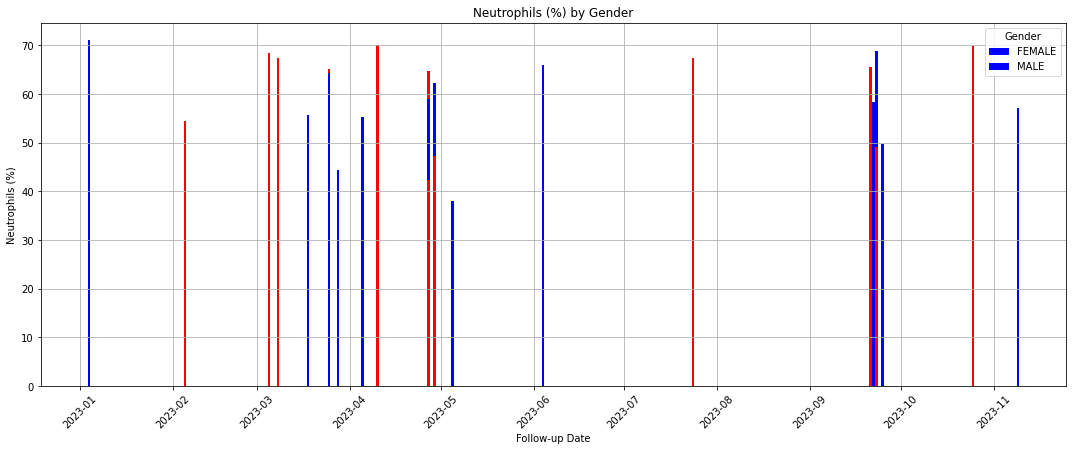

In [61]:

colors =['blue', 'red']  
plt.figure(figsize=(15, 6))

# Loop over unique genders to plot each group separately
for gender, group_data in data_set.groupby('Gender'):
    plt.bar(group_data['Follow-up Clinical Sample Collection Date'], group_data['Neutrophils (%)'], color=colors, label=gender)

# Add labels and title
plt.title('Neutrophils (%) by Gender')
plt.xlabel('Follow-up Date')
plt.ylabel('Neutrophils (%)')
plt.legend(title='Gender')

# Display grid (optional)
plt.grid(True)

# Tight layout and show plot
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()
